In [1]:
import numpy as np
import pandas as pd
import lasio
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Turn .las File to Pandas Dataframe

In [2]:
allmeasurement = []
for i in os.listdir(os.getcwd()+'/log'):
    print(i)
    allmeasurement.append(lasio.read(f'log/{i}').df())

16_10-5.las
16_10-3.las
16_7-6.las
16_5-3.las
16_2-16.las
16_2-11 A.las
16_2-7.las
16_2-6.las
15_9-23.las
7_1-2 S.las


In [3]:
df = pd.concat(allmeasurement)
df.head()

,LITHOLOGY_GEOLINK,DCAL,CALI,BS,ROP,DRHO,NPHI,RHOB,PEF,GR,...,DTS,RDEP,RSHA,RMED,THOR,URAN,SP,SGR,RMIC,DT
DEPT,,,,,,,,,,,,,,,,,,,,,
2607.003174,9.0,0.0,12.250001,12.250001,29.895020,-0.1562,NaN,NaN,NaN,26.150499,...,NaN,1.4087,1.5667,1.4540,NaN,NaN,NaN,NaN,NaN,NaN
2607.155518,9.0,0.0,12.250001,12.250001,30.444233,-0.0481,NaN,NaN,NaN,32.192902,...,NaN,1.3376,1.4699,1.3798,NaN,NaN,NaN,NaN,NaN,NaN
2607.307861,9.0,0.0,12.250001,12.250001,31.657150,-0.0904,NaN,NaN,NaN,34.445301,...,NaN,1.4523,1.5097,1.4549,NaN,NaN,NaN,NaN,NaN,NaN
2607.460205,9.0,0.0,12.250001,12.250001,32.573490,-0.0904,NaN,NaN,NaN,29.497000,...,NaN,1.8369,1.7786,1.7694,NaN,NaN,NaN,NaN,NaN,NaN
2607.612793,9.0,0.0,12.250001,12.250001,31.180120,-0.0904,NaN,NaN,NaN,23.819599,...,NaN,2.2066,2.1475,2.0987,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

##### Data Statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LITHOLOGY_GEOLINK,43622.0,8.618747,4.286255,1.000000,5.000000,9.000000,12.000000,2.200000e+01
DCAL,42428.0,1.271938,68.754797,-7.715330,0.039802,0.259468,0.703050,1.001072e+04
CALI,85840.0,11.958375,2.579871,7.019156,9.042580,12.397801,12.765201,2.402090e+01
BS,87071.0,11.588194,2.283749,8.500000,8.500000,12.250001,12.250001,2.600000e+01
ROP,71001.0,75657.255752,196264.690425,0.000000,44.467846,82.467384,152.018707,2.037071e+06
DRHO,80249.0,0.006207,0.092593,-2.382400,-0.010800,0.004405,0.037294,5.000000e-01
NPHI,74049.0,0.335021,0.136233,-0.015100,0.222809,0.341489,0.445889,9.075010e-01
RHOB,79356.0,2.266915,0.187667,1.257100,2.130700,2.241600,2.417619,3.135500e+00
PEF,79031.0,4.724748,1.744633,1.635700,3.435483,4.332300,5.689471,4.650251e+01
GR,86781.0,85.519212,42.608693,4.992636,53.842861,89.442299,112.542999,1.163366e+03


##### Check Missing Log

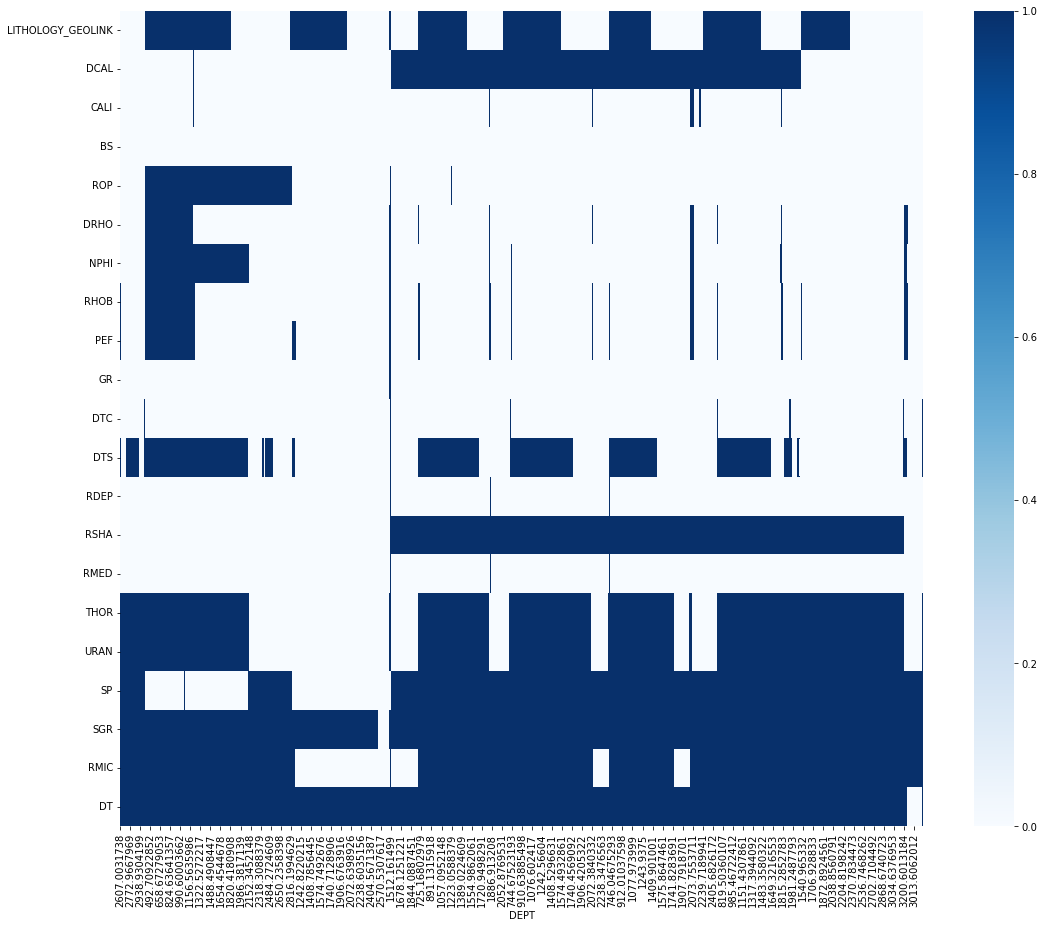

In [5]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.isna().T, cmap='Blues');

##### Check Correlation

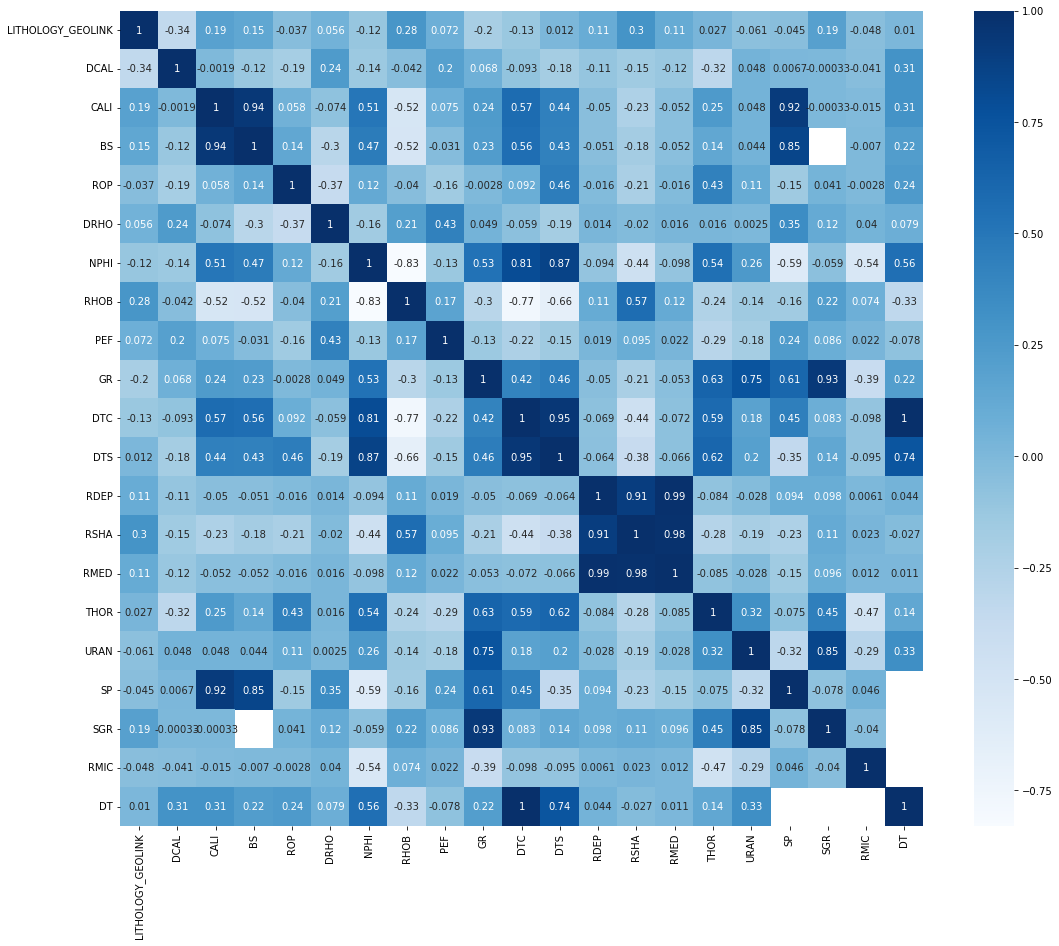

In [6]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

##### Feature Selection

In [7]:
df = df[['DTS', 'GR', 'RHOB', 'CALI', 'DTC', 'NPHI']]
df

,DTS,GR,RHOB,CALI,DTC,NPHI
DEPT,,,,,,
2607.003174,NaN,26.150499,NaN,12.250001,24.497231,NaN
2607.155518,NaN,32.192902,NaN,12.250001,23.912382,NaN
2607.307861,NaN,34.445301,NaN,12.250001,23.788725,NaN
2607.460205,NaN,29.497000,NaN,12.250001,23.135050,NaN
2607.612793,NaN,23.819599,NaN,12.250001,22.007475,NaN
...,...,...,...,...,...,...
3171.645020,NaN,NaN,2.312409,8.225400,NaN,NaN
3171.797363,NaN,NaN,2.342523,8.197600,NaN,NaN
3171.949707,NaN,NaN,NaN,8.178100,NaN,NaN


In [8]:
df.dropna(inplace=True)

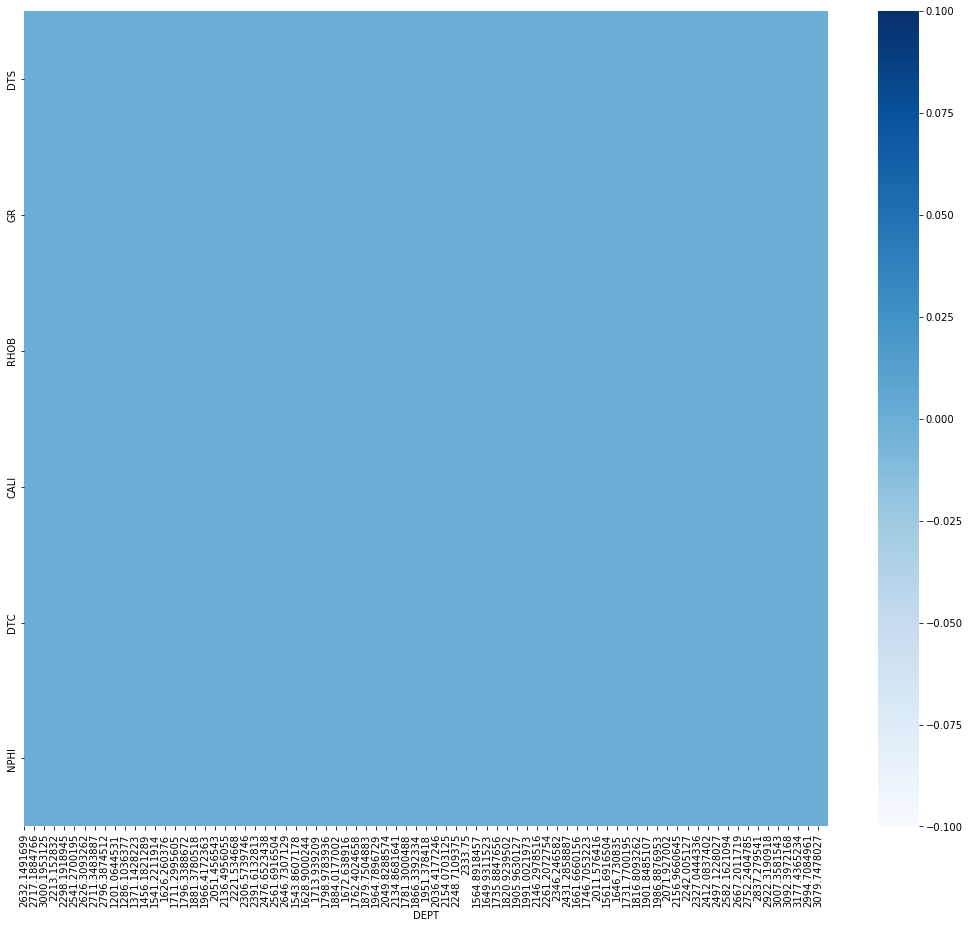

In [9]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.isna().T, cmap='Blues');

### Model Building

##### Train Test Split

In [10]:
X = df.drop(columns=['DTS'])
y = df.DTS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35688, 5), (8923, 5), (35688,), (8923,))

##### Data Scaling

In [11]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Train Linear Regression Model

In [12]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Train Decision Tree Model

In [13]:
model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

##### Train Random Forest Model

In [14]:
model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##### Test Model

In [15]:
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

##### Model Evaluation

In [16]:
acc_lr = np.round(r2_score(y_test, y_pred_lr), 3)
acc_dt = np.round(r2_score(y_test, y_pred_dt), 3)
acc_rf = np.round(r2_score(y_test, y_pred_rf), 3)

print('Model Linear Regression Accuracy = ', acc_lr)
print('Model Decision Tree Accuracy = ', acc_dt)
print('Model Random Forest Accuracy = ', acc_rf)

Model Linear Regression Accuracy =  0.924
Model Decision Tree Accuracy =  0.968
Model Random Forest Accuracy =  0.982


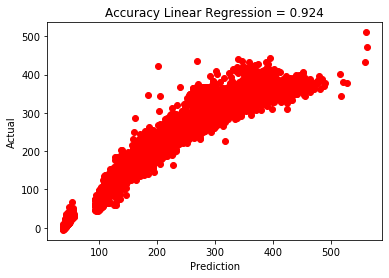

In [17]:
plt.scatter(y_test, y_pred_lr, color='red')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Accuracy Linear Regression = {acc_lr}')
plt.show()

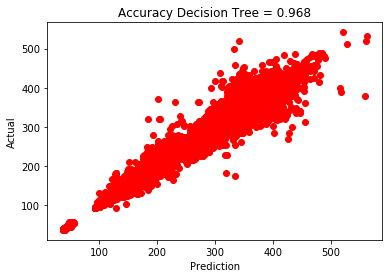

In [18]:
plt.scatter(y_test, y_pred_dt, color='red')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Accuracy Decision Tree = {acc_dt}')
plt.show()

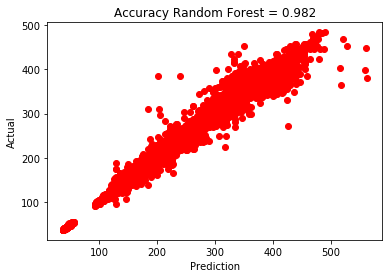

In [19]:
plt.scatter(y_test, y_pred_rf, color='red')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Accuracy Random Forest = {acc_rf}')
plt.show()

### Predict Blind Data

In [20]:
# Read Las and turn to pandas dataframe
val = lasio.read('blind/17_4-1.las').df()
val

,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED
DEPT,,,,,,,,,,,,,
1147.136108,5.0,17.455000,-0.248,NaN,1.997482,50.896889,169.131622,49007256.0,0.649,28.573038,0.862247,NaN,0.862004
1147.288574,5.0,17.474001,-0.248,NaN,1.996519,49.474422,169.195648,49041184.0,0.645,28.620262,0.859740,NaN,0.859010
1147.440918,5.0,17.488001,-0.247,NaN,1.996137,48.512081,169.304443,49048756.0,0.641,28.947498,0.859753,NaN,0.859997
1147.593384,5.0,17.489000,-0.247,NaN,1.996100,48.163830,169.239197,49025440.0,0.639,29.569862,0.862260,NaN,0.862990
1147.745727,5.0,17.513000,-0.247,NaN,1.996100,48.625511,169.609940,49157008.0,0.639,30.107113,0.866010,NaN,0.866987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999.302246,NaN,8.481000,NaN,NaN,NaN,NaN,NaN,NaN,5.601,NaN,NaN,NaN,NaN
3999.454590,NaN,8.479000,NaN,NaN,NaN,NaN,NaN,NaN,5.594,NaN,NaN,NaN,NaN
3999.606934,NaN,8.478000,NaN,NaN,NaN,NaN,NaN,NaN,5.589,NaN,NaN,NaN,NaN


In [21]:
# Feature selection
val = val[['GR', 'RHOB', 'CALI', 'DTC', 'NPHI']]
val = val.dropna()

In [22]:
val

,GR,RHOB,CALI,DTC,NPHI
DEPT,,,,,
1800.170166,55.606209,2.324289,18.919001,110.875572,0.51964
1800.322510,55.605999,2.242022,18.979000,113.136452,0.51964
1800.474854,55.605999,2.154047,18.975000,115.772110,0.51964
1800.627319,55.605999,2.127975,19.233000,117.752655,0.51964
1800.779663,55.605999,2.144872,19.549999,118.940903,0.51964
...,...,...,...,...,...
2903.241211,18.266081,2.036782,12.597000,71.725441,0.00200
2903.393799,18.022398,2.038307,12.597999,71.595573,0.00200
2903.546143,17.197323,2.040925,12.607000,71.357071,0.04111


In [23]:
# Data scalling
val_scaled = scaler.transform(val)

In [24]:
# Model prediction
val_pred = model_rf.predict(val_scaled)

In [25]:
# Store back to dataframe
val['DTS'] = val_pred

In [26]:
val

,GR,RHOB,CALI,DTC,NPHI,DTS
DEPT,,,,,,
1800.170166,55.606209,2.324289,18.919001,110.875572,0.51964,250.854146
1800.322510,55.605999,2.242022,18.979000,113.136452,0.51964,259.468565
1800.474854,55.605999,2.154047,18.975000,115.772110,0.51964,259.782652
1800.627319,55.605999,2.127975,19.233000,117.752655,0.51964,254.720717
1800.779663,55.605999,2.144872,19.549999,118.940903,0.51964,254.067171
...,...,...,...,...,...,...
2903.241211,18.266081,2.036782,12.597000,71.725441,0.00200,143.835283
2903.393799,18.022398,2.038307,12.597999,71.595573,0.00200,142.634701
2903.546143,17.197323,2.040925,12.607000,71.357071,0.04111,140.248243


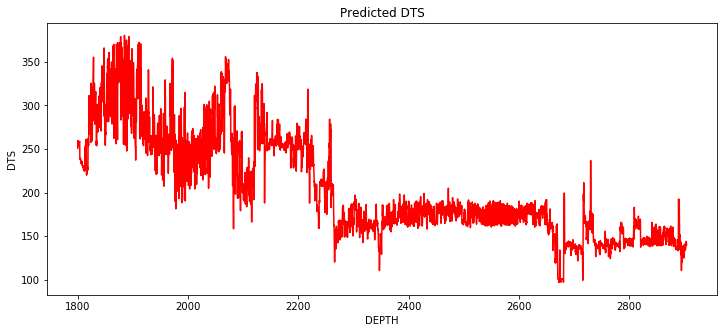

In [27]:
# Plotting
plt.figure(figsize=(12, 5))
plt.plot(val.index.values, val.DTS.values, color='red')
plt.xlabel('DEPTH')
plt.ylabel('DTS')
plt.title('Predicted DTS')
plt.show()